In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [5]:
df.shape

(2356, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
sample = df.iloc[2]
sample

tweet_id                                                     891815181378084864
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-31 00:18:03 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Archie. He is a rare Norwegian Pouncin...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/891815181...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [8]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [9]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv-auth/user/pass', auth=('user', 'pass'))

In [10]:
r

<Response [403]>

In [11]:
# Programatically download the datafile with breed predictions based on the tweet's image from a URL to insure reproducibility
r = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(r)
with open(os.path.join(r.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
        
# read image predictions file into a DataFrame
        
image = pd.read_csv('image-predictions.tsv', sep='\t')
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
ls *.tsv

 Volume in drive C is Windows
 Volume Serial Number is B6E5-76A3

 Directory of C:\Users\Gidi

01-Jul-22  09:36 AM           335,079 image-predictions.tsv
               1 File(s)        335,079 bytes
               0 Dir(s)  489,507,975,168 bytes free


In [13]:
# observe the file
image.iloc[2]

tweet_id                                 666033412701032449
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num                                                   1
p1                                          German_shepherd
p1_conf                                            0.596461
p1_dog                                                 True
p2                                                 malinois
p2_conf                                            0.138584
p2_dog                                                 True
p3                                               bloodhound
p3_conf                                            0.116197
p3_dog                                                 True
Name: 2, dtype: object

### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

In [15]:
# Authenticate to Twitter

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [16]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [17]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [18]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

In [19]:
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 299


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 281


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [20]:
# Opening JSON file
# Reading from json file
with open('tweet_json.txt') as file_in:
    lines = []
    for line in file_in:
        lines.append(line)

In [21]:
# Read the contents of the created file and create a dataframe with the fields of interest 

df = []
with open('tweet_json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
tweet_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

In [22]:
tweet_data

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,7006,33813,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5301,29329,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3480,22048,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7226,36937,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7758,35313,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2322,666049248165822465,37,89,Mon Nov 16 00:24:50 +0000 2015
2323,666044226329800704,115,247,Mon Nov 16 00:04:52 +0000 2015
2324,666033412701032449,36,100,Sun Nov 15 23:21:54 +0000 2015
2325,666029285002620928,39,112,Sun Nov 15 23:05:30 +0000 2015


In [23]:
ls tweet_json.txt

 Volume in drive C is Windows
 Volume Serial Number is B6E5-76A3

 Directory of C:\Users\Gidi

01-Jul-22  10:16 AM        10,618,498 tweet_json.txt
               1 File(s)     10,618,498 bytes
               0 Dir(s)  488,353,026,048 bytes free


In [24]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   create_date     2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [25]:
tweet_data.to_csv('tweet_data_extra.csv', index = False)

## Assessing Data

I assess the quality issues and the tidiness issues. The quality of data concerns the content: completeness, validity, accuracy and consistency. Meanwhile, untidy data has specific structural issues. I checked visually and programatically. 

It is important that the analysis requires that only tweets with original ratings with images be retained, no retweets or replies.

In [26]:
# Load the data gathered data files
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
predictions_img = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
json_data = pd.read_csv('tweet_data_extra.csv')

### Archive

In [27]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
archive_df.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [29]:
archive_df.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None



### NOTES:

#### There are several quality and tidiness issues:

##### Quality issues

- There are many missing values: in_reply_to_status_id-2278, in_reply_to_user_id-2278, retweeted_status_id-2175, retweeted_status_user_id-2175, retweeted_status_timestamp-2175, expanded_urls-59
- There are many columns that are not necessary : 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'
- There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
- There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data
- The timestamp field is not in datatime format
- Source column has HTML codes
- Some rows have several identical values in the expanded_url column
- The name column has many regular words that are NOT a valid dog name
- Values of "None" in the name column.
- There are many errors in the rating as rating_denominator NOT equal to 10 and rating_numerator >= 15

##### Tidiness issues
- There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
- When all rating_denominators are the same (10) this column is no longer needed.
- The columns related to retweets are not applicable for original tweets
- The columns related to replies are not applicable for original tweets

In [30]:
# First we'll check the name column, starting with value counts.
archive_df.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

#### Names

In [31]:
# list all names that are NOT capitalized. Capitalized words are the original names
err_names_mask = archive_df.name.str.contains('^[a-z]', regex = True)
archive_df[err_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [32]:
len(archive_df[err_names_mask])

109

Some names are not actual dog names but random words and these words would be removed from the name columns.

#### Source Column

In [30]:
# value counts for the source column
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

This shows the source of tweets are from four different sources, namely: iphone, vine, twitter web client and tweetdeck.

#### Expanded urls

In [31]:
# Test whether the missing expanded URLs are a problem.
# If there is a link in the tweet's text and no expanded URL then there is an issue

explore = archive_df[archive_df['expanded_urls'].isnull()]
explore['text'].str.contains('http').sum()

0

In [32]:
# expanded_urls
# Next, check the tweets that are missing data in expanded_urls, are they replies or retweets?
# number of tweets with missing urls
sum(archive_df.expanded_urls.isna())

59

In [33]:
# how many tweets with missing urls are replies or retweets?
sum(archive_df.expanded_urls.isna() & \
    (archive_df.in_reply_to_status_id.notnull() | \
     archive_df.retweeted_status_id.notnull()))

56

In [35]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = archive_df.expanded_urls.isna() & \
       archive_df.in_reply_to_status_id.isna() & \
       archive_df.retweeted_status_id.isna()
archive_df[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [36]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = predictions_img.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [58]:
# are any of these tweets in the json_data table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = json_data.tweet_id.isin(tweet_set)
json_data[find_tweet_id]

,tweet_id,retweet_count,favorite_count,create_date
358,828361771580813312,165,2072,Sun Feb 05 21:56:51 +0000 2017
687,785515384317313025,1166,5798,Mon Oct 10 16:20:36 +0000 2016
1417,696518437233913856,1573,3645,Mon Feb 08 02:18:30 +0000 2016


It turns out that these 3 tweets are NOT in the predictions table, and even though they ARE in the json_data table, there was NO image url extracted from the JSON data.

#### Rating_numerator and Rating_denominator

In [38]:
archive_df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


For rating_numerator and rating_denominator, the describe() method shows us some quality issues:

The max values are huge: 1776, 170.
The minimum is 0 for both.

In [59]:
# every numerator not other than 10-14 in the dogs rating is a possible quality issue
archive_df.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [60]:
sum(archive_df.rating_numerator >= 15)

28

The output above shows ALL the rating_numerator values, showing a count of 28 tweets with numerator >= 15. Next, looking at ONLY those ratings with denominators = 10, the results are as follows:

In [64]:
df_tweets_denom_10 = archive_df[archive_df.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [65]:
sum(df_tweets_denom_10.rating_numerator >= 15)

12

Looking at tweets that have denominators = 10, there are 12 with numerators >= 15. I chose 15 as the lower boundary because it's got just 2 counts. Checking the tweets below

In [67]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive_df.rating_denominator == 10) & \
            (archive_df.rating_numerator >= 15) & \
            archive_df.in_reply_to_status_id.isna() & \
            archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive_df[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


Here we have 5 tweets (excluding retweets and replies) with denominator = 10 and numerator >= 15. Looking at the text column there are ratings with huge numbers.

Though there are few tweets from this, I will not drop them since there is no definitive rule by WeRateDogs to not accept wild rating numerators

In [68]:
# display tweets with numerator = 0 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive_df.rating_denominator == 10) & \
            (archive_df.rating_numerator == 0) & \
            archive_df.in_reply_to_status_id.isna() & \
            archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive_df[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,835152434251116546,0,10


It is a real piece of data.

In [61]:
# every denominator not equal to 10 in the dogs rating is a possible quality issue
archive_df.rating_denominator.value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [42]:
sum(archive_df.rating_denominator != 10)

23

When looking at some of those tweets with multiples of 10, there is more than 1 dog in the photo. Ignoring the retweets and replies we have the following list.

In [62]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (archive_df.rating_denominator != 10) & \
            archive_df.in_reply_to_status_id.isna() & \
            archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive_df[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [44]:
sum(mask_find)

17

Using the table above, we can see there are possible issues with the rating denominator that is greater than 10. Even though there is no definitive rule by WeRateDogs to not accept wild rating numerators, the above table suggests these numbers are not the actual ratings. For example, the 24/7 0n tweet id 810984652412424192 suggests it's talking about day and time.

Many of these which are multiples of 10 are about multiple dogs, and the text indicates this, like "floofs", "puppers", "squad" and "pups". I'll drop the tweets for multiples, but I'll reset the rating for single dogs.

#### Tweet_ids

In [45]:
# check for duplicated IDs in the feeds dataframe
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


No duplicate IDs

#### Dog stages

In [70]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [71]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [72]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [73]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

The dog stages column has so many none values. 

### Predictions

In [74]:
predictions_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
predictions_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
predictions_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The predictions dataframe is the only one with numerical data. With .describe() we can check whether the ranges, means and quartiles make sense. In this test, we correctly see that the probability for the first guess has the largest value. We also see that the highest probability is equal to 1, which is expected.

In [77]:
# Checking for duplicated columns by creating a list of every column in every dataset
all_columns = pd.Series(list(archive_df) + list(predictions_img) + list(json_data))
# all_columns
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

The only duplicated column is tweet_id.

In [78]:
predictions_img.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [79]:
predictions_img.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [80]:
predictions_img.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [81]:
# check out 10 of the entries that don't predict dogs
predictions_img[~predictions_img.p1_dog & \
               ~predictions_img.p2_dog & \
               ~predictions_img.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(10)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [82]:
sum(~predictions_img.p1_dog & \
    ~predictions_img.p2_dog & \
    ~predictions_img.p3_dog)

324

In each of the prediction columns there are over 500 instances where the algorithm did not predict a dog breed from the image. When combined, there are 324 cases where there is NO valid dog breed from any of the three predictions.

### json_data

In [83]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   create_date     2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [84]:
json_data.head(10)

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,7006,33813,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5301,29329,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3480,22048,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7226,36937,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7758,35313,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,2600,17809,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,1662,10363,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,15753,56865,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,3619,24524,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,6098,27959,Wed Jul 26 15:59:51 +0000 2017


In [85]:
json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2470.584014,7053.691448
std,6.820795e+16,4184.029933,10961.227647
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1225.000000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2860.500000,8603.500000
max,8.924206e+17,70714.000000,144857.000000


## Assessment Summary
### Quality
#### Archive

[ 1. ] There are many missing values: in_reply_to_status_id-2278, in_reply_to_user_id-2278, retweeted_status_id-2175, retweeted_status_user_id-2175, retweeted_status_timestamp-2175, expanded_urls-59

[ 2' ] There are many columns that are not necessary : 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

[ 3. ] There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

[ 4. ] There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).

[ 5. ] There are 2297 tweets with expanded_urls (links to the tweet), indicating 59 tweets with missing data.

56 of these tweets are replies or retweets.
The remaining 3 tweets have not got the url within the text column. They are NOT in the predictions table, but even though they ARE in the json_data, there was NO image url in the JSON data.

[ 6. ] The timestamp column is in string format.

[ 7. ] There are 109 tweets with regular words in the name column that are NOT a valid name; these words are always the 3rd word in the tweet and are all lowercase; all valid names start with an uppercase letter.

[ 8. ] There are 775 tweets with the dog name as "None". (Probably not worth looking at as there are too many to verify.) [This issue will not be cleaned]

[ 9. ] Ignoring replies and retweets, there are 17 tweets with rating_denominator NOT equal to 10.
4 tweets have the correct rating within the text, and can be manually fixed:
740373189193256964: replace 9/11 with 14/10
716439118184652801: replace 50/50 with 11/10
682962037429899265: replace 7/11 with 10/10
666287406224695296: replace 1/2 with 9/10
13 are about multiple dogs/pups, and can be dropped.

[ 10. ] Ratings with decimal values incorrectly extracted

[ 11. ] There are only 4 types of values in the source column, and they can be simplified by using the display string portion just before the final "<\a>":

- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

[ 12. ] Some rows have several identical values in the expanded_url column

[ 13. ] Tweet_id fields in the three datasets are stored as numeric values and should be strings.

[ 14. ] The values for the column "floffer" should not be capitalized to maintain integrity with the others.

[ 15. ] Create date not needed in more_data_clean (field already exists in tweets dataframe)

#### Predictions

[ 1. ] There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

json_data

[ 1. ] Several tweets (16 during this run) from the original archive table have been deleted since the archive was created (TweepErrors were reported).

### Tidiness
#### archive
[ 1. ] There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".

[ 2. ] It is important to note that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

[ 3. ] Reply tweets are also not “original tweets” either; this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.

[ 4. ] When all rating_denominators are the same (10) this column is no longer needed.

[ 5. ] Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

#### predictions
[ 1. ] The table does not follow the rules of “Tidy Data”; the columns p1, p2 and p3 contain the same type of data, predictions. The columns p1_conf, p2_conf and p3_conf all contain values for confidence level, and columns p1_dog, p2_dog and p3_dog all contain Boolean values indicating whether the prediction is in fact a type of dog. 

[ 2. ] The dog breed prediction with the highest confidence level can be combined with the archive table as the twitter table contains information that is all about the dog in the tweet.

#### json_data
[ 1. ] The json_data table should be combined with the archive table.

## CLEAN DATA

Cleaning the data is the third and last step in the data wrangling process. The issues that were identified are solved programatically, in three steps: Define, Code and Test. We begin by creating copies of each of our three datasets

In [1345]:
# create copies of the dataframes for cleaning
archive_clean = archive_df.copy()
predictions_clean = predictions_img.copy()
json_data_clean = json_data.copy()

In [1346]:
len_archive = archive_clean.shape[0]; len_archive

2356

## Quality archive #1, #2, #3 and #4
## Tidiness archive #2 and #3
    Missing values and unnecessary datas

#### Define
    Remove all observations in the archive_clean dataset that have values in the rows in_reply_to_status_id or retweeted_status_id. Then remove those two columns plus retweeted_status_user_id, retweeted_status_timestamp and in_reply_to_user_id
    
   #### Code
   

In [1347]:
archive_clean = archive_clean[(archive_clean['in_reply_to_status_id'].isna() == True)  & (archive_clean['retweeted_status_id'].isna() == True)]

archive_clean = archive_clean.drop(['in_reply_to_status_id',
                              'in_reply_to_user_id',
                              'retweeted_status_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp'],
                            axis = 1)

**Test**

In [1348]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [1349]:
# confirm the rows are dropped; compare with original table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  259


## Quality archive #11.
**The source column can be simplified by extracting and replacing with it's display string.**

#### Define
Replace the source string with the display portion of itself. Extract the string between <a href=""> and </a>.

#### Code

In [1350]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1351]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [1352]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Quality archive #5.
#### Tweets with missing data in expanded_urls (links to the tweet).

**Define**

    Drop tweets with missing data in the expanded_urls.

  
 #### Code

In [1353]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

**Test**

In [1354]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


In [1355]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Quality archive #6.
#### The timestamp column is in string format, it's the wrong data type.

#### Define
Convert timestamp to datetime data type.

#### Code

In [1356]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [1357]:
archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

## Quality archive #7.
### There are many tweets with regular words in the name column that are NOT a valid name.

#### Define
    Replace all lowercase words in the name column with the string "none".

#### Code

In [1358]:
archive_clean['name'] = archive_clean['name'].apply(lambda x: x if str(x).lower() != x else np.nan)

In [1359]:
archive_clean[archive_clean.name.str.lower() == archive_clean.name].name.unique()

array([], dtype=object)

In [1360]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', nan, 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'H

#### Test

In [1361]:
# All these entries were changed to "none"
archive_clean[names_mask].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

## Quality archive #9 - Part 1.
### Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

#### Define
Manual fix:

- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10

#### Code

In [1362]:
mask_row = archive_clean.tweet_id == 740373189193256964
archive_clean.loc[mask_row, 'rating_numerator'] = 14
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [1363]:
mask_row = archive_clean.tweet_id == 716439118184652801
archive_clean.loc[mask_row, 'rating_numerator'] = 11
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [1364]:
mask_row = archive_clean.tweet_id == 682962037429899265
archive_clean.loc[mask_row, 'rating_numerator'] = 10
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [1365]:
mask_row = archive_clean.tweet_id == 666287406224695296
archive_clean.loc[mask_row, 'rating_numerator'] = 9
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [1366]:
mask_row = archive_clean.tweet_id == 835246439529840640
archive_clean.loc[mask_row, 'rating_numerator'] = 13
archive_clean.loc[mask_row, 'rating_denominator'] = 10

#### Test

In [1367]:
mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive_clean[(archive_clean.tweet_id == 740373189193256964) | \
              (archive_clean.tweet_id == 716439118184652801) | \
              (archive_clean.tweet_id == 682962037429899265) | \
              (archive_clean.tweet_id == 835246439529840640) | \
              (archive_clean.tweet_id == 666287406224695296) ][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",14,10
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,9,10


## Quality archive #9 - Part 2.
#### Some tweets with rating_denominator NOT equal to 10; multiple dogs or no valid rating.

#### Define
Drop the remaining tweets with rating_denominator values that are NOT equal to 10.

#### Code

In [1368]:
# display denominators
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        2
40        1
20        1
10     2081
7         1
Name: rating_denominator, dtype: int64

In [1369]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

#### Test

In [1370]:
# check the values in the column - should only be "10"
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2081
Name: rating_denominator, dtype: int64

## Quality archive #10.
The extracted rating numerators are wrong when they are decimals like 13.5.

#### Define
Change datatype and use regex to extract the ratings numerators again.

#### Code

In [1371]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')

In [1372]:
archive_clean['rating_numerator'] = archive_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

#### Test

In [1373]:
print(archive_clean.rating_numerator.dtype)

object


In [1374]:
archive_clean.loc[archive_clean['tweet_id'] == 883482846933004288, 'rating_numerator']

45    13.5
Name: rating_numerator, dtype: object

In [1375]:
archive_clean.loc[archive_clean['tweet_id'] == 786709082849828864, 'rating_numerator']

695    9.75
Name: rating_numerator, dtype: object

## Tidiness archive #1.
**There are 4 columns for dog stages: doggo, floofer, pupper, puppo.**

#### Define
Melt the 4 columns with the dog stages:

Create a temporary column called none to store the None values; use lowercase 'n' to avoid confusion with 'None' special NA value.
Create a new column stage to store the categories: doggo, floofer, pupper, puppo, as well as None, and select the stage from the column that contains a value.
Cast the stage column to categorical data type.
Drop the 4 original dog stage columns, and the temporary none column.
#### Code

Find multiple dog stages 

In [1376]:
archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1746
1,None,None,None,puppo,23
2,None,None,pupper,None,220
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


Convert 'None' or np.NaN to empty string "" for all columns

In [1377]:
archive_clean.doggo.replace('None', '', inplace=True) and archive_clean.doggo.replace(np.NaN, '', inplace=True)

In [1378]:
archive_clean.floofer.replace('None', '', inplace=True) and archive_clean.floofer.replace(np.NaN, '', inplace=True)

In [1379]:
archive_clean.pupper.replace('None', '', inplace=True) and archive_clean.pupper.replace(np.NaN, '', inplace=True)

In [1380]:
archive_clean.puppo.replace('None', '', inplace=True) and archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [1381]:
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [1382]:
archive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1746
1,,,,puppo,23
2,,,pupper,,220
3,,floofer,,,9
4,doggo,,,,72
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


In [1383]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2081,2081,2081,2081
unique,2,2,2,2
top,,,,
freq,1998,2071,1852,2057


In [1384]:
# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1)]

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

In [1385]:
archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
80,877316821321428993,2017-06-21 00:06:44+00:00,Twitter for iPhone,Meet Dante. At first he wasn't a fan of his ne...,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,


#### Test

In [1386]:
archive_clean.stage.value_counts()

                  1746
pupper             220
doggo               72
puppo               23
doggo, pupper        9
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: stage, dtype: int64

In [1387]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2081 non-null   int64              
 1   timestamp           2081 non-null   datetime64[ns, UTC]
 2   source              2081 non-null   object             
 3   text                2081 non-null   object             
 4   expanded_urls       2081 non-null   object             
 5   rating_numerator    2081 non-null   object             
 6   rating_denominator  2081 non-null   int64              
 7   name                1979 non-null   object             
 8   stage               2081 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 148.7+ KB


## Tidiness json_data #1. & Quality json_data #1.
**The json_data table should be part of the archive table.**

There is also missing data for these fields which is handled in the Additional Cleaning part just below.

#### Define
Merge the retweet_count and favorite_count columns to the archive table, joining on tweet_id.

#### Code

In [1388]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
 3   create_date     2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [1389]:
archive_clean = pd.merge(archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

#### Test

In [1390]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2081 entries, 0 to 2080
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2081 non-null   int64              
 1   timestamp           2081 non-null   datetime64[ns, UTC]
 2   source              2081 non-null   object             
 3   text                2081 non-null   object             
 4   expanded_urls       2081 non-null   object             
 5   rating_numerator    2081 non-null   object             
 6   rating_denominator  2081 non-null   int64              
 7   name                1979 non-null   object             
 8   stage               2081 non-null   category           
 9   retweet_count       2073 non-null   float64            
 10  favorite_count      2073 non-null   float64            
 11  create_date         2073 non-null   object             
dtypes: category(1), datetime64[ns, UTC

### Additional Cleaning
The merge of the json_data table with the archive table caused the data types for retweet_count and favorite_count to change from int64 to float64. There is also missing data for these fields.

#### Define
Drop tweets with missing json_data.
Change the data type for the retweet_count and favorite_count to be int. 

##### Code

In [1391]:
archive_clean = archive_clean[~(archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna())]

# recast the count columns to int type
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)

#### Test

In [1392]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2080
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   object             
 6   rating_denominator  2073 non-null   int64              
 7   name                1971 non-null   object             
 8   stage               2073 non-null   category           
 9   retweet_count       2073 non-null   int32              
 10  favorite_count      2073 non-null   int32              
 11  create_date         2073 non-null   object             
dtypes: category(1), datetime64[ns, UTC

## Quality Archive #16 
**Create date not needed in more_data_clean (field already exists in tweets dataframe)**

#### Define
Remove create_date from more_data_clean dataframe

#### Code

In [1393]:
archive_clean = archive_clean.drop('create_date', axis = 1)

#### Test

In [1394]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2080
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   object             
 6   rating_denominator  2073 non-null   int64              
 7   name                1971 non-null   object             
 8   stage               2073 non-null   category           
 9   retweet_count       2073 non-null   int32              
 10  favorite_count      2073 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), int32(2), int64(2), object(5)
memory usage: 164.3+ KB


In [1395]:
archive_clean.source.value_counts()

Twitter for iPhone     1942
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

## Tidiness Prediction #1 and #3.
The best dog breed prediction and associated confidence level can be combined with the archive table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

#### Define
This is a 2-step process, first creating the columns in the predictions table, then merging to archive.

Part 1:

Create two new columns in predictions called breed and confidence: check each dog breed prediction flag in order (p1_dog, p2_dog, p3_dog), and copy the breed with the highest confidence level into the breed column.
Copy the associated confidence level into the new confidence column.
For cases where all 3 prediction flags are False (NOT a valid dog breed), set breed as 'none' and confidence to 0.

Part 2:
Merge the new breed and confidence columns into the tweet archive table, using an 'inner' join so that we are left with only tweets with images.
Now we can fix the confidence column; round the values up to a whole number in percentage format.

#### Code - Part 1

In [1396]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

#### Test - Part 1

In [1397]:
predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


#### Code - Part 2

In [1398]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2080
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source              2073 non-null   object             
 3   text                2073 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2073 non-null   object             
 6   rating_denominator  2073 non-null   int64              
 7   name                1971 non-null   object             
 8   stage               2073 non-null   category           
 9   retweet_count       2073 non-null   int32              
 10  favorite_count      2073 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), int32(2), int64(2), object(5)
memory usage: 164.3+ KB


In [1399]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
archive_clean = pd.merge(archive_clean, predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
archive_clean.confidence = (archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

#### Test - Part 2

In [1400]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1949
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1950 non-null   int64              
 1   timestamp           1950 non-null   datetime64[ns, UTC]
 2   source              1950 non-null   object             
 3   text                1950 non-null   object             
 4   expanded_urls       1950 non-null   object             
 5   rating_numerator    1950 non-null   object             
 6   rating_denominator  1950 non-null   int64              
 7   name                1854 non-null   object             
 8   stage               1950 non-null   category           
 9   retweet_count       1950 non-null   int32              
 10  favorite_count      1950 non-null   int32              
 11  breed               1950 non-null   object             
 12  confidence          1950 non-null 

In [1401]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,7006,33813,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,5301,29329,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,3480,22048,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,7226,36937,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,7758,35313,basset,55


In [1402]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1403]:
list(predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [1404]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,7006,33813,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,5301,29329,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,3480,22048,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,7226,36937,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,7758,35313,basset,55


## Tidiness archive #4.
**All values in the rating_denominator column are 10, so we don't need this column any more, and the rating_numerator column can be renamed rating.**

#### Define
Drop the rating_denominator column.
Rename the rating_numerator column to be rating.

#### Code


In [1405]:
archive_clean.rating_denominator.value_counts()

10    1950
Name: rating_denominator, dtype: int64

In [1406]:
archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

In [1409]:
archive_clean['rating'] = archive_clean['rating'].astype(float)

#### Test

In [1410]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'breed',
 'confidence']

## Quality archive #12.
**The values for the column "floffer" should not be capitalized to maintain integrity with the others.**

#### Define
Apply string methods to un-capitalize Floffer in the dog_stage values of the dogs dataset.

#### Code


In [1411]:
archive_clean['stage'] = archive_clean['stage'].str.lower()

#### Test

In [1412]:
archive_clean['stage'].value_counts()

                  1648
pupper             201
doggo               62
puppo               22
doggo, pupper        8
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [1413]:
col_list = list(archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating', 'name', 'stage', 'retweet_count', 'favorite_count', 'breed', 'confidence']


In [1414]:
# set the columns in a new order
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stage', 'source', 'text']

archive_clean = archive_clean[col_list]

#### Test

In [1415]:
archive_clean.head(2)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
0,892420643555336193,2017-08-01 16:23:56+00:00,13.0,7006,33813,none,0,Phineas,,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27+00:00,13.0,5301,29329,Chihuahua,32,Tilly,,Twitter for iPhone,This is Tilly. She's just checking pup on you....


## Conclusion
My conclusion after cleaning the identified issues for the project's datasets is prsented thus. I was able to demonstrate data wrangling skills even thoughit took me a very long time to get here with this not perfectly clean master dataset. After the completion with the cleaning phase, all that is left to be done is to save the cleaned master datasets which has been joined into one table.

## Store Data

The cleaned twitter archive data in archive_clean is ready for the analysis phase.Store the archive_clean table into the 'twitter_archive_master.csv' file.

In [1416]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [1417]:
ls *.csv

 Volume in drive C is Windows
 Volume Serial Number is B6E5-76A3

 Directory of C:\Users\Gidi

30-May-22  04:54 PM           382,894 cleaned_df.csv
25-May-22  08:32 PM        40,044,293 tmdb_5000_credits.csv
25-May-22  08:32 PM         5,698,602 tmdb_5000_movies.csv
01-Jul-22  10:25 AM           140,568 tweet_data_extra.csv
01-Jul-22  03:59 PM           440,660 twitter_archive_master.csv
03-Jun-22  07:22 PM           915,692 twitter-archive-enhanced.csv
               6 File(s)     47,622,709 bytes
               0 Dir(s)  487,814,656,000 bytes free


## Analyze Data
The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily - rating, timestamp, retweet_count, favorite_count and prediction - have all undergone cleaning to varying degrees.
With a cleaned dataset we can now proceed to perform some basic analysis to obtain insights from the data. I will explore the data to try and solve the following questions:

- 1 What is the correlation between the 'rating', 'retweet_count', 'favorite_count', 'confidence'?
- 2 Are retweets and likes correlated?
- 3 A Bivariate Analysis
- 4 What is the top 5 most retweeted tweet?
- 5 What is the top 5 most favourited tweet?
- 6 What is the most popular dog name?
- 7 What dog stage receives the best ratings?
- 8 What is the most common stage?
- 9 What dog stage receives more likes and retweets?
- 10 What are the 10 most common breeds of dogs tweeted about?
- 11 What dog breeds have the highest overall favourite counts?
- 12 What are the most popular tweet sources?

In [1418]:
# make a copy of the archive master table for analysis
we_rate_dogs = archive_clean.copy()
we_rate_dogs.info()
we_rate_dogs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries, 0 to 1949
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1950 non-null   int64              
 1   timestamp       1950 non-null   datetime64[ns, UTC]
 2   rating          1950 non-null   float64            
 3   retweet_count   1950 non-null   int32              
 4   favorite_count  1950 non-null   int32              
 5   breed           1950 non-null   object             
 6   confidence      1950 non-null   int32              
 7   name            1854 non-null   object             
 8   stage           1950 non-null   object             
 9   source          1950 non-null   object             
 10  text            1950 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int32(3), int64(1), object(5)
memory usage: 160.0+ KB


0

## Correlation of numerical values

In [1419]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1950.000000,1950.000000,1950.000000,1950.000000
mean,11.665015,2264.578974,7782.494872,46.009744
std,41.103709,4050.651627,11458.334034,33.827292
min,0.000000,11.000000,66.000000,0.000000
25%,10.000000,494.250000,1628.750000,13.250000
50%,11.000000,1084.000000,3506.000000,45.000000
75%,12.000000,2588.250000,9708.250000,77.000000
max,1776.000000,70714.000000,144857.000000,99.000000


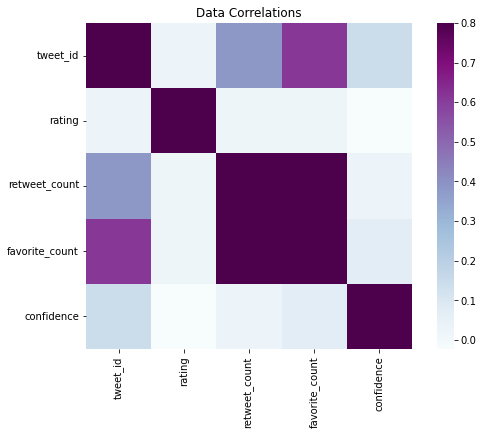

In [1420]:
# get the correlation matrix of the columns
matrix = we_rate_dogs.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
ax.set_title('Data Correlations')
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## Retweets and likes correlation

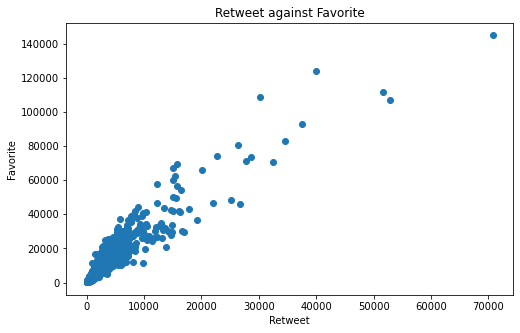

In [1421]:
#explore the retweet and like count
x = we_rate_dogs['retweet_count']
y = we_rate_dogs['favorite_count']
plt.scatter(x, y)
plt.title("Retweet against Favorite")
plt.xlabel("Retweet")
plt.ylabel("Favorite")

plt.show()

The retweets and likes are strongly correlated.

## A Bivariate Analysis

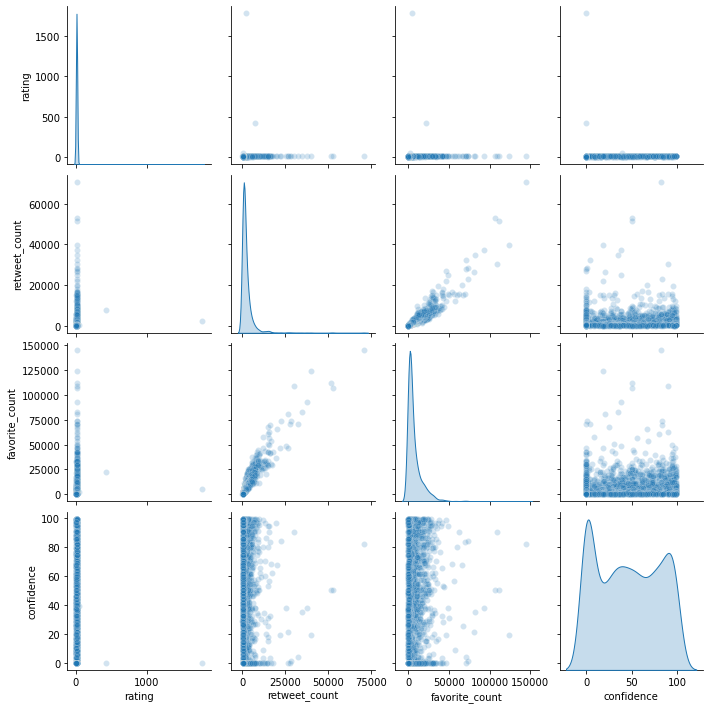

In [1422]:
sns.pairplot(we_rate_dogs, 
             vars = ['rating', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

## Most retweeted tweets

In [1423]:
we_rate_dogs.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
759,744234799360020481,2016-06-18 18:26:18+00:00,13.0,70714,144857,Labrador_retriever,82,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a po...
794,739238157791694849,2016-06-04 23:31:25+00:00,13.0,52891,107234,Eskimo_dog,50,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...
391,807106840509214720,2016-12-09 06:17:20+00:00,13.0,51668,111680,Chihuahua,50,Stephan,,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...
302,822872901745569793,2017-01-21 18:26:02+00:00,13.0,39918,124105,Lakeland_terrier,19,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating ...
58,879415818425184262,2017-06-26 19:07:24+00:00,13.0,37449,92856,English_springer,38,Duddles,,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...


There are 5 most retweeted tweets

## Most loved tweets

In [1424]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
759,744234799360020481,2016-06-18 18:26:18+00:00,13.0,70714,144857,Labrador_retriever,82,None,doggo,Twitter for iPhone,Here's a doggo realizing you can stand in a po...
302,822872901745569793,2017-01-21 18:26:02+00:00,13.0,39918,124105,Lakeland_terrier,19,None,puppo,Twitter for iPhone,Here's a super supportive puppo participating ...
391,807106840509214720,2016-12-09 06:17:20+00:00,13.0,51668,111680,Chihuahua,50,Stephan,,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...
107,866450705531457537,2017-05-22 00:28:40+00:00,13.0,30207,108889,French_bulldog,90,Jamesy,pupper,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...
794,739238157791694849,2016-06-04 23:31:25+00:00,13.0,52891,107234,Eskimo_dog,50,None,doggo,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...


These are the 5 most loved tweets. There are 4 tweets that are in the top 5 for both variables, but the most popular tweet is also the same as the most retweeted tweet.

## Most popular dog names

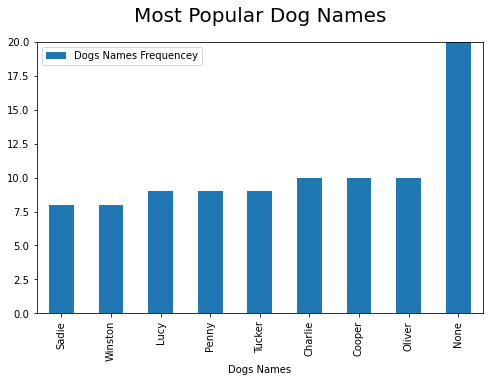

In [1425]:
named_dogs = we_rate_dogs.query('name == name')
named_dogs_grouped = named_dogs.groupby('name').count()[['tweet_id']]
named_dogs_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
named_dogs_grouped.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=20)
plt.title("Most Popular Dog Names",{'fontsize': 20},pad=20)
plt.xlabel("Dogs Names")
plt.legend(["Dogs Names Frequencey"]);

Oliver, Cooper and Charlie are most popular names.

## Best rated dog stages

<AxesSubplot:title={'center':'Best Rated Dog Stage'}, ylabel='stages'>

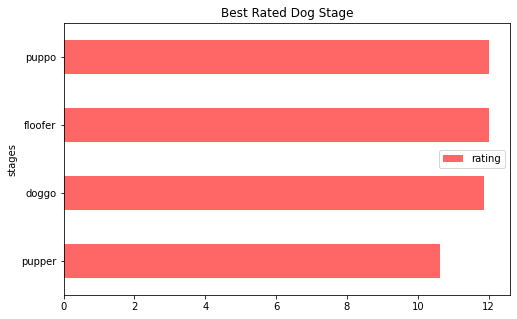

In [1426]:
# we only need the rows with stages
we_rate_dogs_stage = we_rate_dogs[we_rate_dogs["stage"].isnull()==False]

#visualization 'Average favorite counts by stages of dogs'
by_stages = we_rate_dogs_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
rating_by_stages = pd.DataFrame(by_stages.groupby('stage').rating.mean().sort_values())
rating_by_stages['stages'] = rating_by_stages.index
rating_by_stages.plot(x="stages",y='rating',kind='barh',title="Best Rated Dog Stage",color='r', alpha=0.6)

Best Rated dogs are Puppos.

## Most common dog stages

In [1427]:
we_rate_dogs.stage.value_counts()

                  1648
pupper             201
doggo               62
puppo               22
doggo, pupper        8
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [1428]:
with_stage_sum = sum(we_rate_dogs.stage != 'none')
tweets_with_stage = round(with_stage_sum * 100 / we_rate_dogs.shape[0])
print("Number of tweets WITH stage:  {}".format(with_stage_sum))
print("Percentage of tweets:          {}%".format(round(tweets_with_stage, 3)))

Number of tweets WITH stage:  1950
Percentage of tweets:          100%


## Most loved dog stages

<AxesSubplot:title={'center':'Average favorite counts by stages of dogs'}, ylabel='stages'>

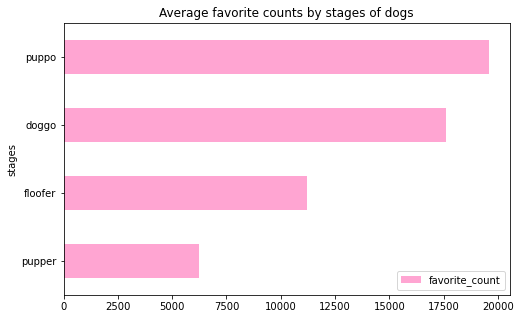

In [1429]:
by_stages = we_rate_dogs_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
favorite_counts_by_stages = pd.DataFrame(by_stages.groupby('stage').favorite_count.mean().sort_values())
favorite_counts_by_stages['stages'] = favorite_counts_by_stages.index
favorite_counts_by_stages.plot(x="stages",y='favorite_count',kind='barh',title="Average favorite counts by stages of dogs",color='hotpink', alpha=0.6)

Puppos are the most loved dog stages.

## Most retweeted dog stages

<AxesSubplot:title={'center':'Average retweet counts by stages of dogs'}, ylabel='stages'>

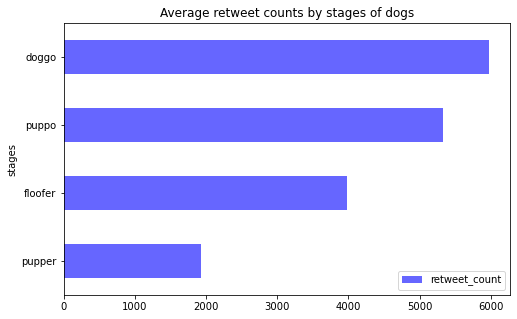

In [1430]:
by_stages = we_rate_dogs_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
retweet_counts_by_stages = pd.DataFrame(by_stages.groupby('stage').retweet_count.mean().sort_values())
retweet_counts_by_stages['stages'] = retweet_counts_by_stages.index
retweet_counts_by_stages.plot(x="stages",y='retweet_count',kind='barh',title="Average retweet counts by stages of dogs",color='b', alpha=0.6)

Puppos are the most retweeted stages of dog

## Distibution of dog breeds ratings based on highest favourite counts

In [1432]:
fav_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1677909
Labrador_retriever    1021032
Pembroke               905215
Chihuahua              666846
French_bulldog         526140
Samoyed                482074
chow                   386670
cocker_spaniel         352212
pug                    325367
malamute               304722
Name: favorite_count, dtype: int32

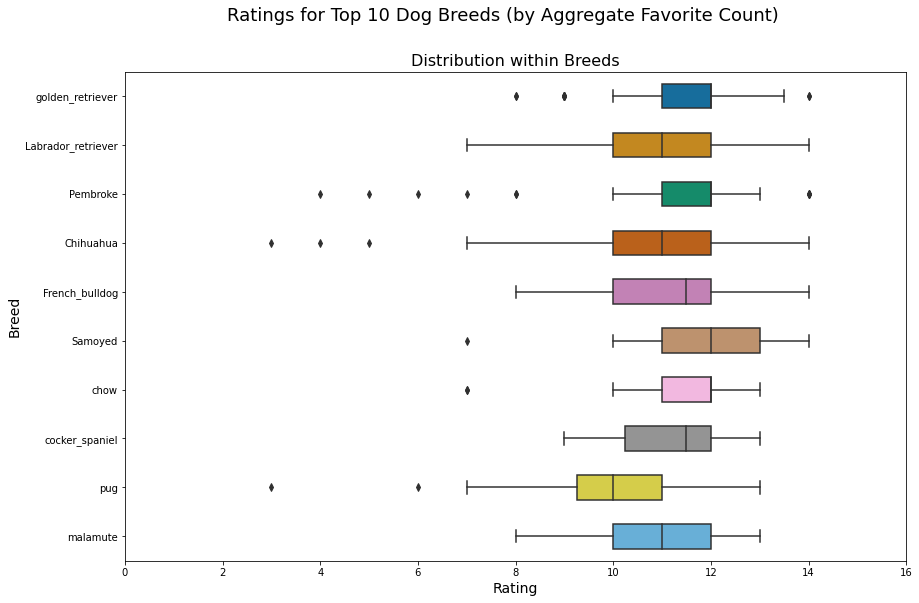

In [1433]:
plt.figure(figsize = (14, 9))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = we_rate_dogs,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
# plt.yticks(rotation = 60,  fontsize = 12)
plt.show()

The boxplot here shows the distribution of ratings within each of the top 10 dog breeds as ranked by aggregate favourite count. All the breeds range between 7 and 14, with a only a some outliers.Golden leads the pack here.

## Most retweeted dog breeds

In [1434]:
#create top 10 most retweeted dog breed
top_10 = we_rate_dogs.nlargest(10,"retweet_count")[["breed","retweet_count"]]
top_10

,breed,retweet_count
759,Labrador_retriever,70714
794,Eskimo_dog,52891
391,Chihuahua,51668
302,Lakeland_terrier,39918
58,English_springer,37449
325,standard_poodle,34543
393,cocker_spaniel,32391
107,French_bulldog,30207
1390,Bedlington_terrier,28591
1447,whippet,27795


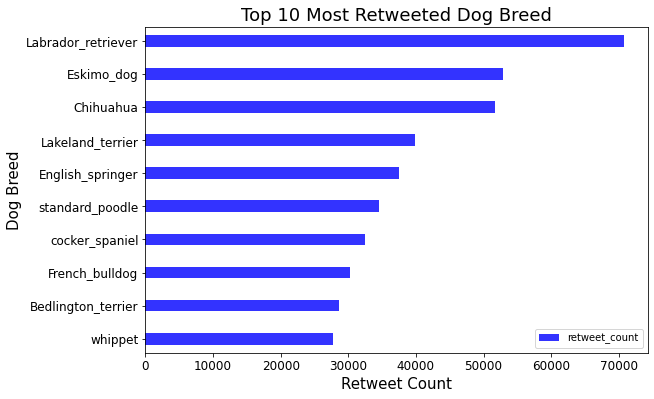

In [1435]:
#a graph of top 10 most retweet dog breed
top_10.groupby("breed")["retweet_count"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["b"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Dog Breed",fontsize=15, color="k")
plt.xlabel("Retweet Count",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top 10 Most Retweeted Dog Breed", fontsize=18, color="k");

Labrador_retriever, Eskimo_dog, and Chihuahua are most retweeted dog breeds.

## Most loved dog breeds

In [1436]:
#create top 10 most loved dog breed
top_10 = we_rate_dogs.nlargest(10,"favorite_count")[["breed","favorite_count"]]
top_10

,breed,favorite_count
759,Labrador_retriever,144857
302,Lakeland_terrier,124105
391,Chihuahua,111680
107,French_bulldog,108889
794,Eskimo_dog,107234
58,English_springer,92856
325,standard_poodle,82710
133,malamute,80586
92,golden_retriever,73957
1390,Bedlington_terrier,73534


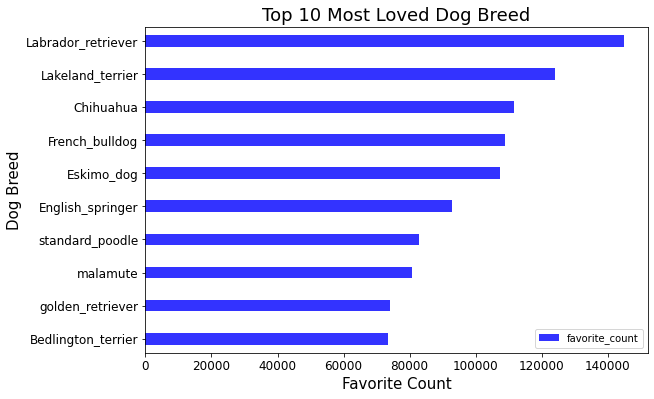

In [1437]:
#a graph of top 10 most loved dog breed
top_10.groupby("breed")["favorite_count"].sum().sort_values().plot(kind="barh",
                                                                                 rot = 0,
                                                                                 width = 0.35,
                                                                                 color=["b"],
                                                                                 alpha = 0.8,
                                                                                 fontsize = 12,
                                                                                 figsize=(9,6),
                                                                                 )

plt.ylabel("Dog Breed",fontsize=15, color="k")
plt.xlabel("Favorite Count",fontsize=15, color="k")
plt.legend(loc="lower right")
plt.title("Top 10 Most Loved Dog Breed", fontsize=18, color="k");

Labrador_retriever, Lakeland_terrier and Chihuahua are most loved dog breeds.

## Most source of the tweets

Text(0, 0.5, '')

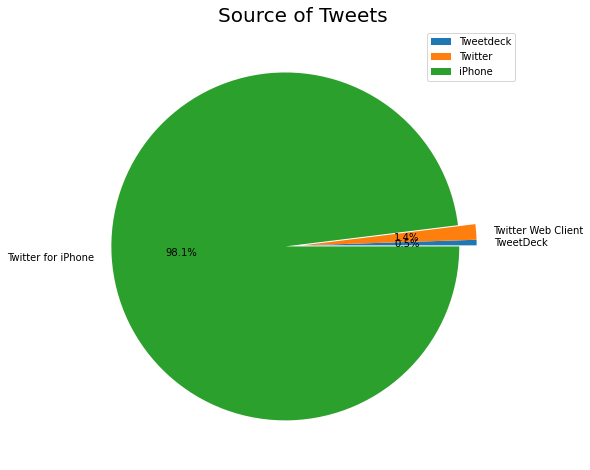

In [1438]:
tweet_sources = we_rate_dogs.groupby('source').count()[['tweet_id']]
tweet_sources.rename(columns={'tweet_id': 'source_count'}, inplace=True)
tweet_sources['source_percentage'] = tweet_sources.source_count / tweet_sources.source_count.sum() * 100
tweet_sources['source_percentage'].plot.pie(figsize=(10,8), autopct='%1.1f%%',
        explode=(0,0,0.1))
plt.title("Source of Tweets", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "iPhone"])
plt.ylabel("")

98.1% of the tweets was posted using iPhone twitter app with just few comimg from other sources and that because of the tweets are from @WeRateDogs account.

In [1439]:
archive_clean.source.value_counts()

Twitter for iPhone    1912
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64